# LiDAR Uncertainty at two NEON Field Sites

Systematic and random error may both occur in tree height data as measured on the ground (or *in situ*) by humans, or through LiDAR measurements. This notebook loads and plots tree height data for comparison between *in situ* and LiDAR estimated data sets from two National Ecological Observatory Network (NEON) Field Sites in California, United States.

### Soaproot Saddle (SOAP) Field Site
![Soaproot Saddle Field Site](img/Soaproot_pano.jpeg)
Image Credit: National Ecological Oberservatory Network, https://www.neonscience.org/field-sites/soap

### San Joaquin Experimental Range (SJER) Field Site 
![SJER Field Site](img/SJER_pano.jpeg)
Image Credit: National Ecological Observatory Network, https://www.neonscience.org/field-sites/sjer

In [2]:
# Import packages
import os
import pathlib

import earthpy as et
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterstats as rs
import xarray as xr
import rioxarray as rxr
import seaborn as sns

from dataloaders import NEONDataLoader

# Get lidar data
et.data.get_data('spatial-vector-lidar')

# Set working directory
working_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'spatial-vector-lidar')

# Check working directory exists, create directory if does not exist
if not os.path.exists(working_dir):
    print('Path does not exist. Creating...')
    os.makedirs(working_dir)
os.chdir(working_dir)

# Check working directory path is correct
print(working_dir)


NameError: name 'os' is not defined

In [ ]:
class SJERDataLoader(NEONDataLoader):
    """Loads NEON SJER data into geoDataFrame"""

    site_name = 'SJER'
    id_col_name = 'Plot_ID'
    formatting_dict = {'separator': '_', 'plot': '_plot'}

sjer_data_loader = SJERDataLoader()
sjer_gdf = sjer_data_loader.height_stats
sjer_gdf

,geometry,Plot_ID,Point,easting,northing,plot_type,lidar_max,lidar_mean,insitu_max,insitu_mean
0,"POLYGON ((255872.376 4111567.818, 255872.280 4...",SJER1068,center,255852.376,4111567.818,trees,19.049999,11.544347,19.3,3.866667
1,"POLYGON ((257426.967 4111298.971, 257426.871 4...",SJER112,center,257406.967,4111298.971,trees,24.019999,10.369277,23.9,8.221429
2,"POLYGON ((256858.760 4110819.876, 256858.664 4...",SJER116,center,256838.760,4110819.876,grass,16.070000,7.518398,16.0,8.218750
3,"POLYGON ((256196.947 4108752.026, 256196.851 4...",SJER117,center,256176.947,4108752.026,trees,11.059999,7.675346,11.0,6.512500
4,"POLYGON ((255988.372 4110476.079, 255988.276 4...",SJER120,center,255968.372,4110476.079,grass,5.740000,4.591177,8.8,7.600000
5,"POLYGON ((257098.867 4111388.570, 257098.771 4...",SJER128,center,257078.867,4111388.570,trees,19.139999,8.987087,18.2,5.211765
6,"POLYGON ((256703.434 4111071.087, 256703.338 4...",SJER192,center,256683.434,4111071.087,grass,16.549999,7.229096,13.7,6.769565
7,"POLYGON ((256737.467 4112167.778, 256737.371 4...",SJER272,center,256717.467,4112167.778,trees,11.840000,7.107061,12.4,6.819048
8,"POLYGON ((256054.390 4111533.879, 256054.294 4...",SJER2796,center,256034.390,4111533.879,soil,20.279999,6.409630,9.4,5.085714
9,"POLYGON ((258517.102 4109856.983, 258517.006 4...",SJER3239,center,258497.102,4109856.983,soil,12.910000,6.009128,17.9,3.920833


In [ ]:
class SOAPDataLoader(NEONDataLoader):
    """Loads NEON SOAP site data into geoDataFrame"""

    site_name = 'SOAP'
    id_col_name = 'ID'
    formatting_dict = {'separator': '-', 'plot': ''}

    def id_mod(self, id):
        """ Adds site name to plot number in ID column."""

        return 'SOAP' + str(id)

soap_data_loader = SOAPDataLoader()
soap_gdf = soap_data_loader.height_stats
soap_gdf

,geometry,ID,OBJECTID,Protocols,plotDimens,plotType,subtype,lidar_max,lidar_mean,insitu_max,insitu_mean
1,"POLYGON ((297065.197 4100713.028, 297065.101 4...",SOAP43,2,"beetles, soils, coarse-downed wood, leaf area ...",40.0,distributed,base,54.099998,19.804080,51.1,5.047000
2,"POLYGON ((299825.197 4101013.028, 299825.101 4...",SOAP63,3,"beetles, soils, coarse-downed wood, leaf area ...",40.0,distributed,base,32.480000,16.989834,33.0,9.232787
4,"POLYGON ((298715.197 4100833.028, 298715.101 4...",SOAP95,5,"beetles, soils, coarse-downed wood, leaf area ...",40.0,distributed,base,33.869999,17.412048,28.1,6.050943
5,"POLYGON ((297065.197 4100083.028, 297065.101 4...",SOAP139,6,"beetles, soils, coarse-downed wood, leaf area ...",40.0,distributed,base,49.919998,19.417840,120.0,4.745902
6,"POLYGON ((299885.197 4100413.028, 299885.101 4...",SOAP143,7,"beetles, soils, coarse-downed wood, leaf area ...",40.0,distributed,base,27.340000,10.454653,19.7,2.530702
7,"POLYGON ((297545.197 4100533.028, 297545.101 4...",SOAP187,8,"beetles, soils, coarse-downed wood, leaf area ...",40.0,distributed,base,47.959999,13.221389,134.0,4.878947
9,"POLYGON ((297515.197 4100683.028, 297515.101 4...",SOAP299,10,"beetles, soils, coarse-downed wood, leaf area ...",40.0,distributed,base,34.189999,18.852112,33.1,13.896154
10,"POLYGON ((297065.197 4100593.028, 297065.101 4...",SOAP331,11,"beetles, soils, coarse-downed wood, leaf area ...",40.0,distributed,base,45.500000,18.149803,39.2,5.009848
22,"POLYGON ((299315.197 4101463.028, 299315.101 4...",SOAP223,23,"beetles, soils, coarse-downed wood, leaf area ...",40.0,distributed,base,13.469999,6.155488,8.2,2.444186
23,"POLYGON ((297785.197 4101193.028, 297785.101 4...",SOAP283,24,"beetles, soils, coarse-downed wood, leaf area ...",40.0,distributed,base,19.369999,5.781789,13.8,3.328571


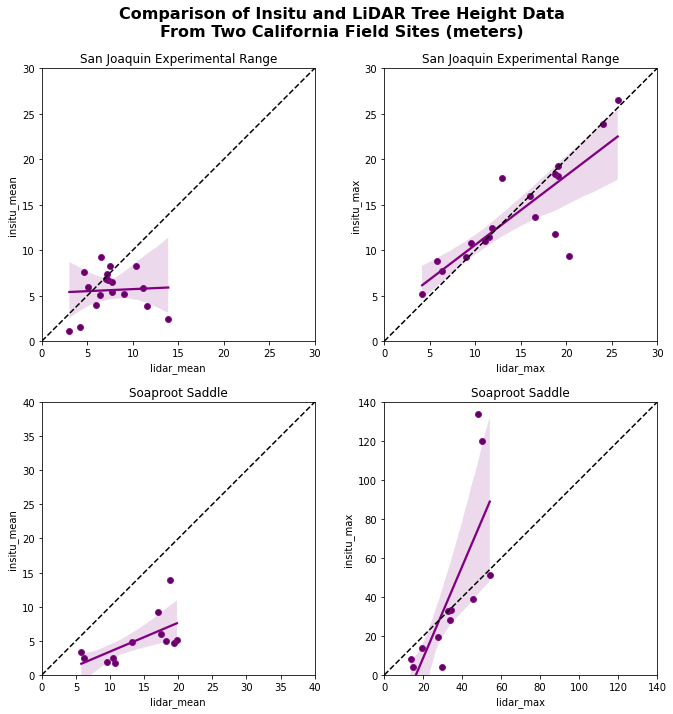

In [ ]:
def plot_height_stats(height_stats_gdf, axs, site, upper_lim, aggr):
    """
    Plot of Insitu and LiDAR tree height max and means.
    ----------
    Parameters:
    height_stats_gdf: GeoPandasDataFrame
        GeoPandasDataFrame with LiDAR and insitu tree height statistics.

    axs: figure ax
        Ax figure to add to plot.

    site: str
        Site Name.

    upper_lim: int
        Upper x and y limits for plot axis.

    aggr: str
        Aggregation statistic to plot (mean or max)
    -------
    Returns:
    plot_height_stats: Plot of tree height statistics.
    """
    # Set limits and aspect of plot
    axs.set(xlim=(0, upper_lim), ylim=(0, upper_lim), aspect='equal')

    # Define plot type and columns to plot
    sns.scatterplot(
        x='lidar_{aggr}'.format(aggr=aggr),
        y='insitu_{aggr}'.format(aggr=aggr),
        data=height_stats_gdf, color='black',ax=axs)

    # Plot regression
    sns.regplot(
        x='lidar_{aggr}'.format(aggr=aggr),
        y='insitu_{aggr}'.format(aggr=aggr),
        data=height_stats_gdf, color='purple', ax=axs)

    # Set plot title labels
    axs.set_title(site)

    # Plot 1:1 line
    axs.plot(
        (0, 1), (0, 1),
        transform=axs.transAxes,
        ls='--', c='k')
    return plot_height_stats

# Plot Insitu vs LiDAR Tree Height Data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
plt.suptitle(
    'Comparison of Insitu and LiDAR Tree Height Data\n'
    'From Two California Field Sites (meters)',
    fontweight='bold',
    fontsize=16)
plt.tight_layout(pad=2, h_pad=4, w_pad=0.5)

plot_height_stats(sjer_gdf, ax1, 'San Joaquin Experimental Range', 30, 'mean')
plot_height_stats(sjer_gdf, ax2, 'San Joaquin Experimental Range', 30, 'max')
plot_height_stats(soap_gdf, ax3, 'Soaproot Saddle', 40, 'mean')
plot_height_stats(soap_gdf, ax4, 'Soaproot Saddle', 140, 'max')

plt.show()